<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Алина, привет! рад опять смотреть твою работу! <br />
<br />    

<br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# 1. Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import timeit
import lightgbm as lgb
from sklearn.metrics import log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/datasets/autos.csv')

In [3]:
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [4]:
data.isnull().mean()

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

In [5]:
data = data.dropna().copy()

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

4

Файл загружен и изучен:16 столбцов:7 целочисленных столбцов,9 объектных в 354369 строк. Пропуски в данных присутствуют(в 5 столбцах),пропуски удалены для дальнейшего обучения моделей,есть дуликаты(4),но так как при данной информации они возможны, из данных их не удаляем.

Столбцы с данными о дате скачивания анкеты из базы,дате создания анкеты,дате последней активности пользователя,количестве фотографий автомобиля,почтовом индексе владельца анкеты (пользователя) не несут в дальнейшей работе с таблицей полезной информации, то есть будут удалены из матрицы признаков.

### Исследование качественных данных


In [8]:
data['VehicleType'].value_counts()

sedan          72257
small          58929
wagon          51171
bus            23649
convertible    16207
coupe          12221
suv             9639
other           1741
Name: VehicleType, dtype: int64

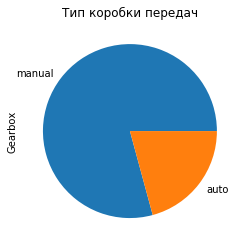

In [9]:
data['Gearbox'].value_counts().plot(kind = 'pie',title = 'Тип коробки передач')

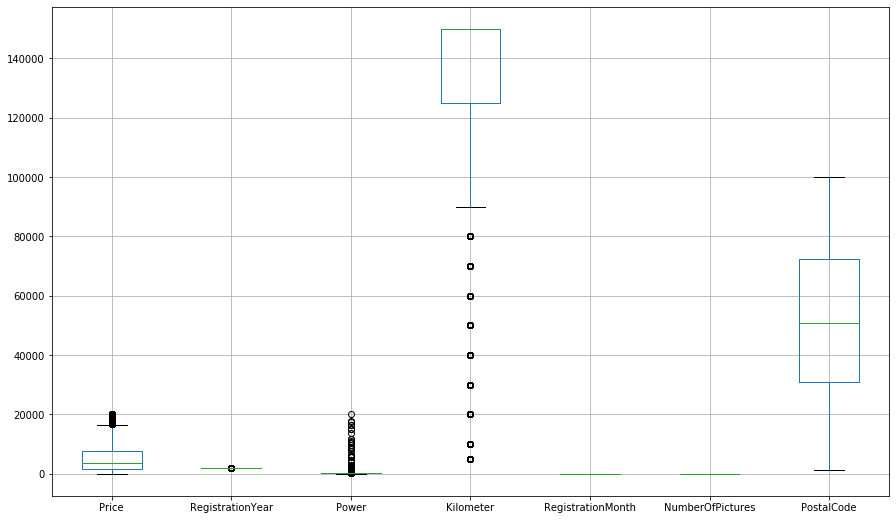

In [10]:
data.boxplot(figsize = (15,9))
plt.show()

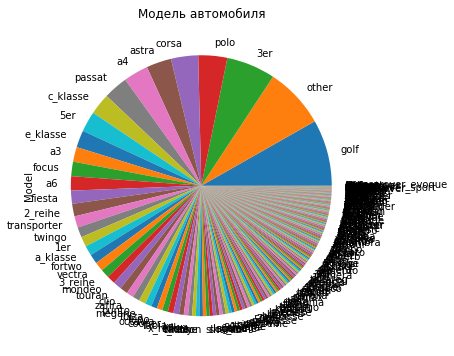

In [11]:
data['Model'].value_counts().plot(kind ='pie',title = "Модель автомобиля",figsize = (6,6))

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
красиво, но не читаемо для презентации((((( Я просто предсталяю, что выходить с таким графико на заказчика....

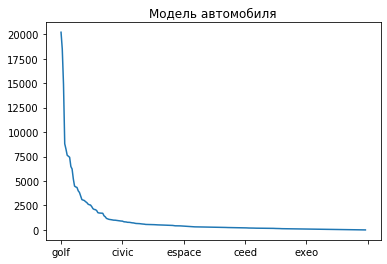

In [12]:
data['Model'].value_counts().plot(title = "Модель автомобиля")

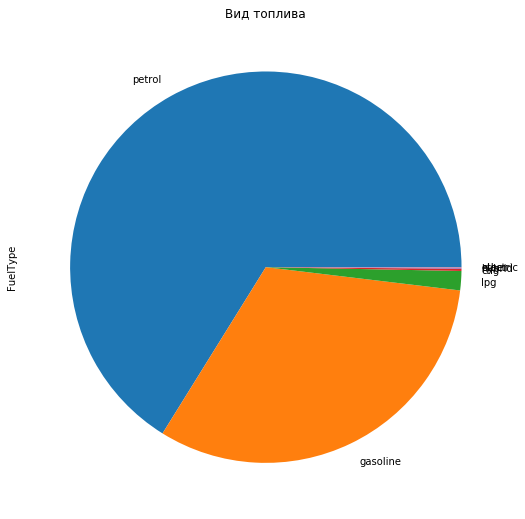

In [13]:
data['FuelType'].value_counts().plot(kind = 'pie',title = 'Вид топлива',figsize = (9,9))

In [14]:
data['NotRepaired'].value_counts()

no     217996
yes     27818
Name: NotRepaired, dtype: int64

In [15]:
data['Brand'].value_counts()

volkswagen       51837
bmw              27244
opel             26211
mercedes_benz    23922
audi             21554
ford             17100
renault          11634
peugeot           7824
fiat              6337
seat              4909
skoda             4401
mazda             3961
citroen           3663
toyota            3624
nissan            3507
smart             3349
hyundai           2735
mini              2693
volvo             2481
mitsubishi        2042
honda             1929
kia               1888
alfa_romeo        1680
suzuki            1679
chevrolet         1282
chrysler          1013
dacia              723
porsche            548
subaru             534
daihatsu           520
jeep               502
land_rover         421
saab               417
jaguar             389
daewoo             337
lancia             309
rover              258
trabant            211
lada               146
Name: Brand, dtype: int64

Исследование качественных данных показало, что есть большая концентрация автомобилей определенной марки и бренда,однако принято решение не объединять некоторые малочисленные модели в одну категорию,так как это сильно искажает качество модели.
Распределение автомобилей,которые были в ремонте и не были 9 к 1.

### Исследование количественных данных

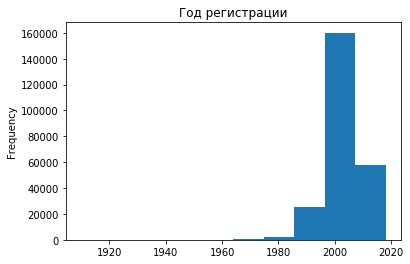

In [16]:
data['RegistrationYear'].plot(kind = 'hist',
                               title = 'Год регистрации'
                      )

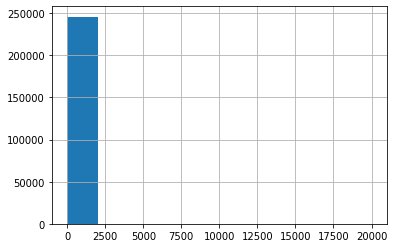

In [17]:
data['Power'].hist()

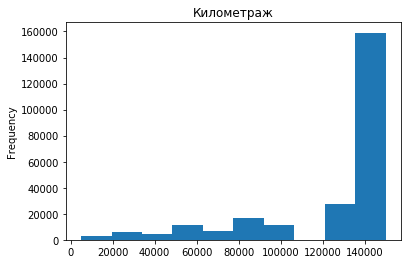

In [18]:
data['Kilometer'].plot(kind = 'hist',
                               title = 'Километраж'
                      )

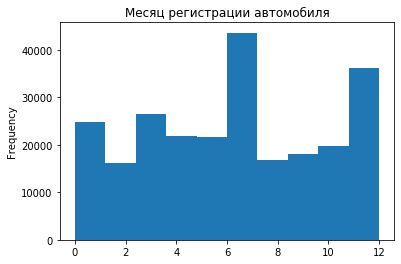

In [19]:
data['RegistrationMonth'].plot(kind = 'hist',
                               title = 'Месяц регистрации автомобиля',
                               x = 'количество автомобилей',
                               y = 'месяц регистрации'
                              )

Километраж автомобилей сконцентрирован на промежутке 130 -150 тыс.км, в данной категории имеются небольшие выбросы.Год и месяц регистрации имеют ненормальное распределение.

### Целевой признак 

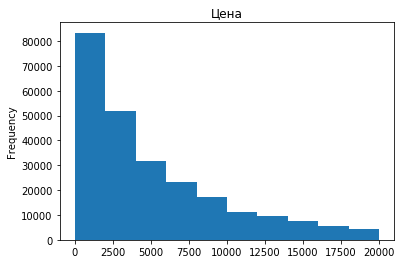

In [20]:
data['Price'].plot(kind = 'hist',
                   title = 'Цена'
                      )

In [21]:
data['Price'].describe()

count    245814.000000
mean       5125.346717
std        4717.948673
min           0.000000
25%        1499.000000
50%        3500.000000
75%        7500.000000
max       20000.000000
Name: Price, dtype: float64

Значение цены в 75% случаях варьируется от 0 до 6400 единиц,остальные же 25% значения доходят до 20000 единиц, что говорит о концентрации цены автомобилей на определенном промежутке.

### Взаимосвязь столбцов

In [22]:
data.corr(method = 'spearman')

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.726710,0.512263,-0.378696,0.058967,NaN,0.067674
RegistrationYear,0.726710,1.000000,0.214733,-0.433943,0.031021,NaN,0.043986
Power,0.512263,0.214733,1.000000,0.109300,0.041529,NaN,0.068536
Kilometer,-0.378696,-0.433943,0.109300,1.000000,-0.010322,NaN,-0.018169
RegistrationMonth,0.058967,0.031021,0.041529,-0.010322,1.000000,NaN,0.003804
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.067674,0.043986,0.068536,-0.018169,0.003804,NaN,1.000000


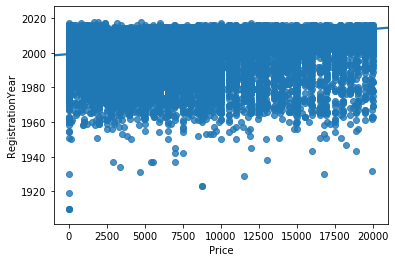

In [23]:
sns.regplot(x = 'Price',y = 'RegistrationYear',data = data)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74e4127a90>,
      dtype=object)

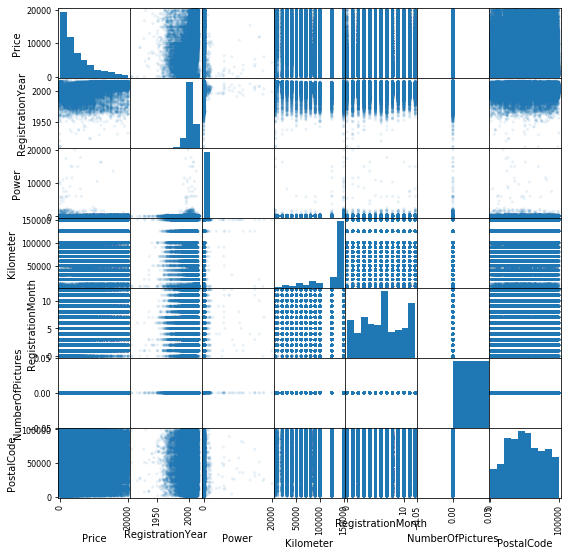

In [24]:
pd.plotting.scatter_matrix(data,figsize = (9,9),alpha = 0.1)

Существует прямая сильная взаимосвязь данных года регистрации и цены на автомобиль, обратная слабая связь километража и цены автомобиля, то есть цена автомобиля, в основном,напрямую зависит от года регистрации автомобиля и в обратной зависимости от его километража. 

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Понятно, Алина.<br>
Ты поработала с пропусками, с дубликатами. Это хорошее начало, и хочется ещё проолжения)))<br>
В данных остались ещё некоторые моменты, которые по разному оказывают влияние на модель.<br>
В общем, они такие, что требуют ещё работы.<br>
Чтобы последовательно двигаться, можно состаить для себя некий алгоритм.<br>
    

Например, можно так подходить:<br>
есть данные количественные и категориальные.<br>
есть в данных: дубли, аномалии и пропуски.<br>

можно так и начинать:<br>
- 1)исследование данных (а целевую переменную в отдельном пункте!) на аномалии.<br>
- 2)исследование категориальных данных на анотмалии (напрмиер в какой либо категории есть только одно значение. Тогда и не должно быть этой категории)<br>  
- 3)исследование на дубликаты<br><br>  
- 4)Исследование кол. данных на пропуски<br>
- 5)исследование категор. данных на пропуски<br>
- 6) Отдельным блоко: исследование данных на взаимосвязь друг с другом<br>
Не помню, может писал у же тебе, что раздел "анализ факторов": исходя из типа шкалы, можно применять следующие графический и аналитический анализы:<br>
-- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
-- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
-- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br><br>
    
<font color='red'>
Это пункт надо бы дополнить)<br>

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='red'>
посмотри ещё вот на эти столбцы, пожалуйста. Они по разным причинам будут лишними в модели, буду засорять её и делать малопригодной для использования в бизнесе. Разбери этот момент ещё раз:<br>
'DateCrawled', 'DateCreated', 'PostalCode', 'LastSeen', 'NumberOfPictures'

# 2. Обучение моделей

In [25]:
#порядковое кодирование
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(data),columns=data.columns)

In [26]:
features_t, features_valid, target_t, target_valid = train_test_split(
    data_ordinal.drop(['Price','DateCrawled','DateCreated','PostalCode', 'LastSeen', 'NumberOfPictures'], axis=1), data_ordinal['Price'], test_size=0.2, random_state=12345)

In [27]:
features_train, features_test, target_train, target_test = train_test_split(
    features_t, target_t, test_size=0.2, random_state=12345)

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


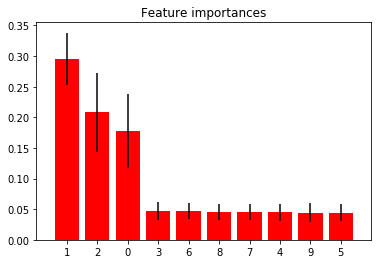

In [28]:
#Future_importance
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


features_t,target_t = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(features_t,target_t)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(features_t.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(features_t.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(features_t.shape[1]), indices)
plt.xlim([-1, features_t.shape[1]])
plt.show()

Использован лес деревьев для оценки важности функций в задаче искусственной классификации. Красные столбцы - основанные на примесях свойства леса, а также их изменчивость между деревьями.

График показывает,что 3 объекта являются информативными, а остальные - нет.

In [29]:
lgb_train = lgb.Dataset(features_train, target_train,
                        weight=features_train, free_raw_data=False)
lgb_eval = lgb.Dataset(features_valid, target_valid, reference=lgb_train,
                       weight=features_valid, free_raw_data=False)

In [30]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'square loss',
    'alias':'mean_squared_error',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [31]:
start_time = timeit.default_timer()

In [33]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                valid_sets=lgb_train)

In [34]:
gbm.save_model('model.txt')

In [35]:
bst = lgb.Booster(model_file='model.txt')

In [36]:
prediction1 = bst.predict(features_valid)
print('RMSE:', round(mean_squared_error(target_valid,prediction1) ** 0.5,5))
print('Время обучения,сек.:',timeit.default_timer() - start_time)

RMSE: 1568.91706
Время обучения,сек.: 4925.256085800007


In [37]:
#CatBoost
model2_1 = CatBoostRegressor(depth = 10,learning_rate =0.1,iterations =50)
start_time = timeit.default_timer()
model2_1.fit(features_train,target_train)
prediction2_1 = model2_1.predict(features_valid)
print('RMSE:', round(mean_squared_error(target_valid,prediction2_1) ** 0.5,5))
print('Время обучения,сек.:',timeit.default_timer() - start_time)

model2_2 = CatBoostRegressor(depth = 11,learning_rate =0.5,iterations =100)
start_time = timeit.default_timer()
model2_2.fit(features_train,target_train)
prediction2_2 = model2_2.predict(features_valid)
print('RMSE:', round(mean_squared_error(target_valid,prediction2_2) ** 0.5,5))
print('Время обучения,сек.:',timeit.default_timer() - start_time)

model2_3 = CatBoostRegressor(depth = 12 ,learning_rate =0.8,iterations =150)
start_time = timeit.default_timer()
model2_3.fit(features_train,target_train)
prediction2_3 = model2_3.predict(features_valid)
print('RMSE:', round(mean_squared_error(target_valid,prediction2_3) ** 0.5,5))
print('Время обучения,сек.:',timeit.default_timer() - start_time)

0:	learn: 825.7930124	total: 219ms	remaining: 10.7s
1:	learn: 767.1329540	total: 426ms	remaining: 10.2s
2:	learn: 715.8800079	total: 697ms	remaining: 10.9s
3:	learn: 670.8941707	total: 911ms	remaining: 10.5s
4:	learn: 631.6789673	total: 1.11s	remaining: 9.97s
5:	learn: 596.5941489	total: 1.31s	remaining: 9.63s
6:	learn: 565.5535133	total: 1.59s	remaining: 9.78s
7:	learn: 539.3798575	total: 1.81s	remaining: 9.5s
8:	learn: 515.3237640	total: 2.01s	remaining: 9.15s
9:	learn: 495.2872660	total: 2.21s	remaining: 8.85s
10:	learn: 477.3504692	total: 2.5s	remaining: 8.86s
11:	learn: 461.1644053	total: 2.7s	remaining: 8.56s
12:	learn: 447.7683686	total: 2.91s	remaining: 8.29s
13:	learn: 435.7455828	total: 3.2s	remaining: 8.22s
14:	learn: 424.8515576	total: 3.4s	remaining: 7.95s
15:	learn: 416.4297830	total: 3.69s	remaining: 7.85s
16:	learn: 407.5881736	total: 3.9s	remaining: 7.56s
17:	learn: 400.5104483	total: 4.1s	remaining: 7.28s
18:	learn: 394.2051760	total: 4.3s	remaining: 7.01s
19:	learn: 

In [38]:
#выбор значения гиперпараметра max_depth для модели № 3
max_depth_array = [1, 3, 5,6, 7, 10, 15,20,25]
model3 = DecisionTreeRegressor()
grid = GridSearchCV(model3, param_grid={'max_depth': max_depth_array})
grid.fit(features_train,target_train)
best_max_depth = grid.best_estimator_.max_depth
print(grid.best_score_, best_max_depth)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8173095555892915 15


In [39]:
#модель № 3
model3 = DecisionTreeRegressor(random_state = 123,max_depth = 10)
start_time = timeit.default_timer()
model3.fit(features_t,target_t)
prediction3 = model3.predict(features_valid)
print('RMSE:', round(mean_squared_error(target_valid,prediction3) ** 0.5,5))
print('Время обучения,сек.:',timeit.default_timer() - start_time)

RMSE: 1569.1531
Время обучения,сек.: 0.03223671484738588


In [40]:
#кросс-валидация модели 3
cross_val_score(model3,features_valid,target_valid,cv=5).mean()

0.7990301507645154

Перед обучением применено порядковое кодирование.

Модели обучены, по каждой модели подсчитана метрика качества RSME и время обучения модели. Выбрана модель № 2_2, как наилучшая, так как она показана наилучшую оптимальность качества модели и скорости ее обучения.

Модель № 1:
RMSE: 1568.91706
Время обучения,сек.: 40.89580227993429

Модель № 2_1:
RMSE: 334.94543
Время обучения,сек.: 15.541696599684656

<font color='orange'>
Модель № 2_2:
RMSE: 306.53859
Время обучения,сек.: 31.16562348883599
</font>

Модель № 2_3: 
RMSE: 315.11532
Время обучения,сек.: 52.57715622987598

Модель № 3:
RMSE: 372.50749
Время обучения,сек.: 0.7028986196964979

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
Хорошо, идейно тут - в эту сторону.<br>
Метрики будут иными, когда "уйдут" лишние столбцы.)<br>
    
И такой ещё момент: если применяется кросс-валидация для подбора параметров, то можне НЕ разбиать на три выборки.

### Проверка модели на адекватность 

In [41]:
#проверка модели №3 на тестовой выборке 
predictions = model2_2.predict(features_test)
print('RSME:',mean_squared_error(target_test, predictions)** 0.5)
print('Время обучения,сек.:',timeit.default_timer() - start_time)

RSME: 305.0282731295928
Время обучения,сек.: 0.7497482784092426


In [42]:
dummy_clf = DummyClassifier(strategy="most_frequent")
start_time = timeit.default_timer()
dummy_clf.fit(features_t,target_t)
predictions = dummy_clf.predict(features_test)
print('RSME:',mean_squared_error(target_test, predictions) ** 0.5)
print('Время обучения,сек.:',timeit.default_timer() - start_time)

RSME: 1583.7757343996668
Время обучения,сек.: 0.0026844991371035576


Модель № 2_2 протестирована на тестовой выборке и проверена на адекватность. Так как RSME в модели № 2_2 намного лучше, чем в дамми-модели, модель № 2_2 проверку на адекватность прошла.

# 3. Анализ моделей

По каждой модели подсчитана метрика качества RMSE и время обучения модели, наилучшей моделью была выбрана модель № 2_2,так как она показала наилучшее качество модели по выбранной метике при максимальной скорость обучения среди моделей градиентного бустинга.

# Вывод

Файл загружен и изучен:16 столбцов:7 целочисленных столбцов,9 объектных в 354369 строк. Пропуски в данных присутствуют(в 5 столбцах),пропуски удалены для дальнейшего обучения моделей,есть дуликаты(4),но так как при данной информации они возможны, из данных их не удаляем.

Столбцы с данными о дате скачивания анкеты из базы,дате создания анкеты,дате последней активности пользователя,количестве фотографий автомобиля,почтовом индексе владельца анкеты (пользователя) не несут в дальнейшей работе с таблицей полезной информации, то есть будут удалены из матрицы признаков.

Исследование качественных данных показало, что есть большая концентрация автомобилей определенной марки и бренда. Распределение автомобилей,которые были в ремонте и не были 9 к 1.

Километраж автомобилей сконцентрирован на промежутке 130 -150 тыс.км, в данной категории имеются небольшие выбросы.Год и месяц регистрации имеют ненормальное распределение.

Значение цены в 75% случаях варьируется от 0 до 6400 единиц,остальные же 25% значения доходят до 20000 единиц, что говорит о концентрации цены автомобилей на определенном промежутке.

Существует прямая сильная взаимосвязь данных года регистрации и цены на автомобиль, обратная слабая связь километража и цены автомобиля, то есть цена автомобиля, в основном,напрямую зависит от года регистрации автомобиля и в обратной зависимости от его километража.

Использован лес деревьев для оценки важности функций в задаче искусственной классификации. Красные столбцы - основанные на примесях свойства леса, а также их изменчивость между деревьями.

График показывает,что 3 объекта являются информативными, а остальные - нет.

Перед обучением применено порядковое кодирование.

Модели обучены, по каждой модели подсчитана метрика качества RSME и время обучения модели. Выбрана модель № 2_2, как наилучшая, так как она показана наилучшую оптимальность качества модели и скорости ее обучения.

Модель № 1:
RMSE: 1568.91706
Время обучения,сек.: 467.2946367096156

Модель № 2_1:
RMSE: 334.94543
Время обучения,сек.: 15.541696599684656

<font color='orange'>
Модель № 2_2:
RMSE: 306.53859
Время обучения,сек.: 29.9011981198564177
</font>

Модель № 2_3: 
RMSE: 315.11532
Время обучения,сек.: 52.57715622987598

Модель № 3:
RMSE: 372.50749
Время обучения,сек.: 0.7028986196964979

Модель № 2_2 протестирована на тестовой выборке и проверена на адекватность. Так как RSME в модели № 2_2 намного лучше, чем в дамми-модели, модель № 2_2 проверку на адекватность прошла.

По каждой модели подсчитана метрика качества RMSE и время обучения модели, наилучшей моделью была выбрана модель № 2_2,так как она показала наилучшее качество модели по выбранной метике при максимальной скорость обучения среди моделей градиентного бустинга.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'>
привет, Алина! спасибо, что отреагировала на мои комментарии<br>
Работа стала интереснее. Даже важность вывела)))) здорово<br>
если говорить о предобработке данных, то совсем иной подход уже). Есть, правда, графики (например круговая по всеМ маркам, или скатеплот по всем данным), которые только запутают сам анализ. Их лучше в таком виде не применять)))<br>
Но в целом - ОК)<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Алина, в целом, всё неплохо идёт! <br>
Модельная работа - на хорошем уровне.<br>
Вопросы только к этапу предобработки данных<br>

<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>
1) После подбора параметров модели, когда уже настаёт этап тестировани. Можно обучить на обобщённой выборке (трайн + валидация) ну и тестировать потом. Это может ещё прибавить точности.(если не используеься кросс-валидаци)<br>
    
2) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br>
    
3) Когда в выодах есть ссылка на несколько резуьтатов (тиа: из нескольких моделей выбрали....) то лучше выводить  всё в виде таблички результатов.<br>
       
4) предварительная работа с данными:<br>
- На этом этапе нужно БОЛЬШЕ аргументации, для принимаемых решений.<br>
- Также, можно организовать для себя некую систему работы с данными:<br>
 
Например, алгоритм такой может:<br>
1) анализ аномалий <br>
2) анализ пропусков <br>
3) проверка дубликатов<br>
4) Анализ факторов: исходя из типа шкалы, могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма
    
<font color='red'>
Если говорить конкретно об этом проекте:<br>
1) Надо немного глубже поработать с данными: там много чего есть для очистки<br>
2) Также, есть лишний столбцы для анализа, лучше их удалить<br>
3) Если будет время (НЕ обязательно, но для реальной практики оень важно уметь), то п.2) было бы здорово сделать (feature_importances_)<br>
<font color='green'>    
<br><br>
СПАСИБО) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

</b></font>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей